# Week1 Tutorial/Lab: Linear Regression on the Diabetes Dataset
1. Load & prepare data
2. EDA
3. Train/Test split (80/20)
4. Closed-form and sklearn
5. Compare coefficients
6. Compute R² on train & test
7. Try with other datasets

#### Load the required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Load the diabetes dataset from sklearn

In [2]:
# Load the Diabetes data
diabetes = load_diabetes()

# Put it into a DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# X = all features, y = disease progression target
X = df.values
y = diabetes.target

print('X.shape =', X.shape, 'y.shape =', y.shape)

X.shape = (442, 10) y.shape = (442,)


<h2 style="color:red;">Task1: Exploratory Data Analysis</h2>

Diabetes Dataset:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


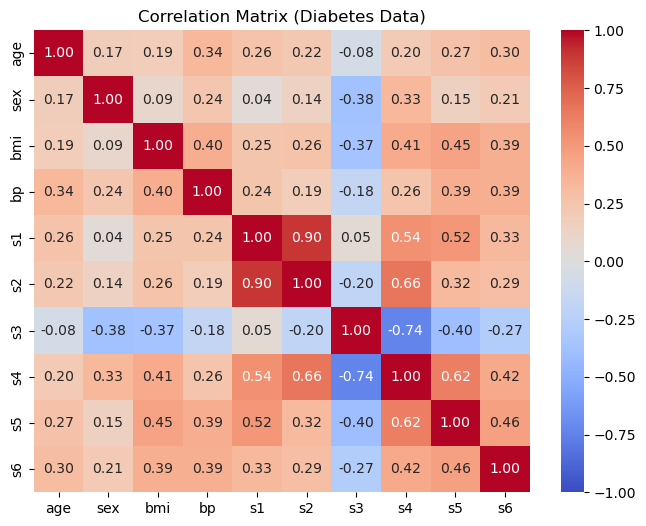

In [3]:
# Display the first few rows
print("Diabetes Dataset:")
display(df.head())

# Compute correlation matrix (features)
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Diabetes Data)')
plt.show()

<h2 style="color:red;">Task2: Train–Test Split (80/20)</h2> 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train_b = np.hstack([np.ones((len(y_train),1)), X_train])
X_test_b  = np.hstack([np.ones((len(y_test),1)),  X_test])
print('Train', X_train_b.shape, 'Test', X_test_b.shape)

Train (353, 11) Test (89, 11)


<h2 style="color:red;">Task3: Closed-Form and sklearn</h2> 

In [5]:
# Closed-form OLS
beta_closed = np.linalg.pinv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T.dot(y_train))

# sklearn
lr = LinearRegression(fit_intercept=False).fit(X_train_b, y_train)
beta_sk = lr.coef_

print('Closed:', np.round(beta_closed,4))
print('sklearn:', np.round(beta_sk,4))

Closed: [  153.4797   -43.4525  -280.5551   528.9877   346.4914 -1032.2799
   661.5386   241.0675   240.5252   798.2399   123.1719]
sklearn: [  153.4797   -43.4525  -280.5551   528.9877   346.4914 -1032.2799
   661.5386   241.0675   240.5252   798.2399   123.1719]


<h2 style="color:red;">Task4: R² on Train & Test</h2>  

In [6]:
y_train_pred = X_train_b.dot(beta_closed)
y_test_pred  = X_test_b.dot(beta_closed)

print('Closed R² train=', r2_score(y_train, y_train_pred),
      ' test=',  r2_score(y_test, y_test_pred))

print('sklearn R² train=', lr.score(X_train_b,y_train),
      ' test=', lr.score(X_test_b,y_test))

Closed R² train= 0.5271287506420188  test= 0.46263830098374814
sklearn R² train= 0.5271287506420188  test= 0.4626383009837498


#### Overfitting & Regularization
- If test R² ≪ train R², you may be overfitting
- <a style="color:green;">Question: What do you notice?</a>
  
<a style="color:blue;">Next week:</a> Ridge, Lasso to control coefficient size.

<h2 style="color:red;">Extra Task: Instead of Iris dataset, load a datasets listed below and execute the above tasks.</h2>  
<a style="color:green;">Question: Which dataset might be overfitting?</a>

In [7]:
# for california housing dataset
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)